# TUGAS BESAR MACHINE LEARNING TAHAP 1 CLUSTERING

---
**Ghilman Muhammad Zaki - 1301194217**

# Pengunduhan Data Set

Link dataset bersumber dari : https://drive.google.com/drive/folders/14QPe3o6LeSjfYj-kGhCZJM4pn-I55YsJ?usp=sharing. 

In [1]:
!gdown --id "1qKwfBtdGcpflaaS9DFf5p3VHFXGRSIVw"
!gdown --id "1WEiWPmtvwXDYDofKzJzg75SH22UCqqOb"

Downloading...
From: https://drive.google.com/uc?id=1qKwfBtdGcpflaaS9DFf5p3VHFXGRSIVw
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 10.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WEiWPmtvwXDYDofKzJzg75SH22UCqqOb
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 32.8MB/s]


# Praprocessing Data

In [2]:
#Import libary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import copy
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Input data train
data = pd.read_csv("kendaraan_train.csv")
data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
#Info data train
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [5]:
#Mengukur besaran missing value
kosong = pd.isnull(data).sum()
isi = pd.notna(data).sum()
jumlah = kosong.sum()+ isi.sum()
print(kosong)
print("Data kosong : ",kosong.sum()/jumlah*100)
print("Data Terisi : ",isi.sum()/jumlah*100)


id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64
Data kosong :  4.166681244045141
Data Terisi :  95.83331875595485


In [6]:
#Mengecek data yang memiliki duplikat
data.duplicated().sum()

0

In [7]:
#Mengisi data yang missing value
data = data.dropna()
data.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

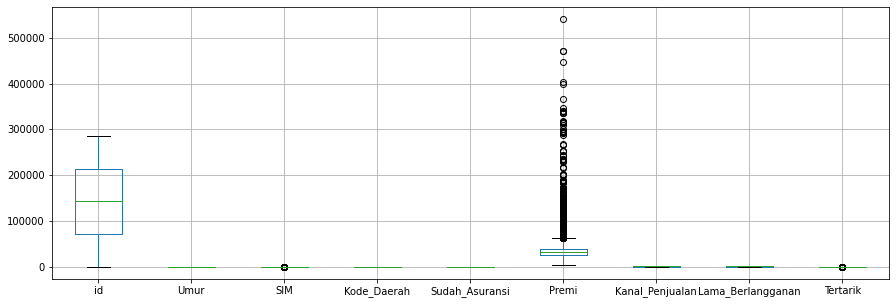

In [8]:
#Memerikas outlier
data.boxplot(figsize = [15,5])

In [9]:
#Menghapus outlier
Q1 = data['Premi'].quantile(0.25)
Q3 = data['Premi'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Premi'] < (Q1 - 1.5 * IQR)) | (data['Premi'] > (Q3 + 1.5 * IQR)))]

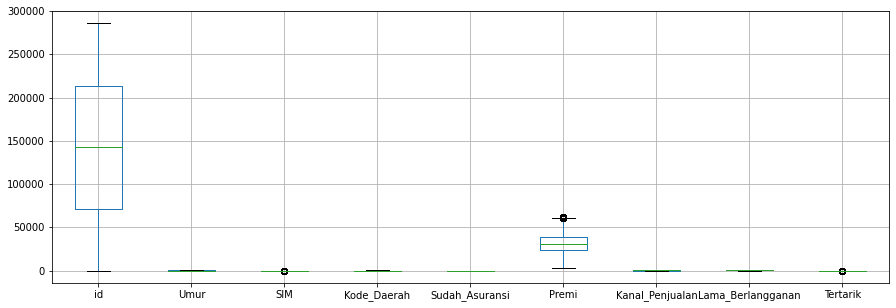

In [10]:
#Tanpa Outlier
data.boxplot(figsize=[15,5])

In [11]:
#Merubah tipe data object menjadi tipe data float
data = data.replace({"Tidak":0, "Pernah":1})
data = data.replace({"< 1 Tahun":0, "1-2 Tahun":0.5,"> 2 Tahun":1})
data = data.replace({"Wanita":0, "Pria":1})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166396 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 166396 non-null  int64  
 1   Jenis_Kelamin      166396 non-null  int64  
 2   Umur               166396 non-null  float64
 3   SIM                166396 non-null  float64
 4   Kode_Daerah        166396 non-null  float64
 5   Sudah_Asuransi     166396 non-null  float64
 6   Umur_Kendaraan     166396 non-null  float64
 7   Kendaraan_Rusak    166396 non-null  int64  
 8   Premi              166396 non-null  float64
 9   Kanal_Penjualan    166396 non-null  float64
 10  Lama_Berlangganan  166396 non-null  float64
 11  Tertarik           166396 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 16.5 MB


In [12]:
#Normalisai Data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
data = pd.DataFrame(scaled, columns=data.columns)
data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.000000,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.429632,0.932099,0.301038,0.0
1,0.000003,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.391928,0.172840,0.512111,0.0
2,0.000010,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0.0
3,0.000017,1.0,0.015385,1.0,0.673077,1.0,0.0,0.0,0.340083,0.932099,0.557093,0.0
4,0.000028,0.0,0.000000,1.0,0.153846,1.0,0.0,0.0,0.476268,0.981481,0.072664,0.0


In [13]:
#Menentukan korelasi data dari setiap kolom data
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,-0.002867,0.002691,-0.004537,0.000597,-0.003850,0.002562,0.003116,0.002643,-0.001621,0.001875,0.000203
Jenis_Kelamin,-0.002867,1.000000,0.146765,-0.018560,0.003361,-0.083527,0.161450,0.092747,0.000843,-0.114324,-0.002683,0.053465
Umur,0.002691,0.146765,1.000000,-0.077054,0.044503,-0.255741,0.767813,0.268526,0.046519,-0.574807,-0.001055,0.108781
SIM,-0.004537,-0.018560,-0.077054,1.000000,-0.005427,0.016505,-0.036813,-0.018596,-0.010671,0.041623,0.002136,0.008330
Kode_Daerah,0.000597,0.003361,0.044503,-0.005427,1.000000,-0.023573,0.043460,0.025871,-0.004068,-0.044871,-0.003771,0.010484
Sudah_Asuransi,-0.003850,-0.083527,-0.255741,0.016505,-0.023573,1.000000,-0.380251,-0.825533,0.012411,0.219563,0.002768,-0.340680
Umur_Kendaraan,0.002562,0.161450,0.767813,-0.036813,0.043460,-0.380251,1.000000,0.397208,0.020461,-0.547689,-0.002279,0.220513
Kendaraan_Rusak,0.003116,0.092747,0.268526,-0.018596,0.025871,-0.825533,0.397208,1.000000,0.000909,-0.224076,-0.001943,0.353388
Premi,0.002643,0.000843,0.046519,-0.010671,-0.004068,0.012411,0.020461,0.000909,1.000000,-0.105819,0.001831,0.019686
Kanal_Penjualan,-0.001621,-0.114324,-0.574807,0.041623,-0.044871,0.219563,-0.547689,-0.224076,-0.105819,1.000000,0.000017,-0.139186


# Pemodelan

In [14]:
#Memilih fitur
df = pd.DataFrame(data, columns= ["Umur", "Kanal_Penjualan"])
df

,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.584615,0.759259
3,0.015385,0.932099
4,0.000000,0.981481
...,...,...
166391,0.046154,0.932099
166392,0.015385,0.932099
166393,0.046154,0.932099
166394,0.738462,0.759259


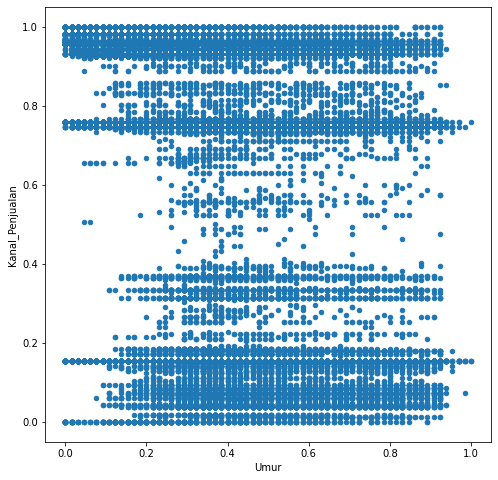

In [29]:
#Visualisasi data sebelum clustering
df.plot(kind='scatter', x= 'Umur', y= 'Kanal_Penjualan', figsize=[8,8])

In [30]:
#Merubah bentuk data ke dalam array
x = []
y = []
for i in range(len(df)):
    x.append(df['Umur'][i])
    y.append(df['Kanal_Penjualan'][i])
print(x[0:3], y[0:3])

[0.15384615384615385, 0.4307692307692308, 0.5846153846153846] [0.9320987654320987, 0.1728395061728395, 0.7592592592592592]


In [16]:
#Membuat prosedur centroid awal
def centroid(k,x,y):
    centroid = []
    for i in range(k):
        n = random.randint(0, len(x))
        c = x[n], y[n]
        centroid.append(c)
    return centroid


In [17]:
#Membuat prosedur Euclidean
def euclidean (c,x,y):
    jarak = [[]for i in range(len(x))]
    for i in range(len(x)):
        for j in range(len(c)):
            d = math.sqrt(math.pow((x[i]-c[j][0]),2)+math.pow((y[i]-c[j][1]),2))
            jarak[i].append(d)
    return jarak


In [18]:
#Membuat prosedur clusterring
def clusterring(c,x,y):
    cluster = [[]for i in range(len(c))]   
    jarak = euclidean(c,x,y)
    for i in range(len(jarak)):
        mins = jarak[i].index(min(jarak[i]))
        cluster[mins].append(i)
    return cluster
        

In [19]:
#Membuat centroid baru
def newCentroid(cluster, x, y) :
    centroid = []
    for i in range(len(cluster)):
        sumx = 0
        sumy = 0
        for j in cluster[i]:
            sumx = sumx + (x[j])
            sumy = sumy + (y[j])
        sum = sumx/len(cluster[i]), sumy/len(cluster[i])
        centroid.append(sum)
    return centroid

In [24]:
#Membuat prosedur visualisasi data
def showPlot(cluster, data, centroid,i):
  fig, ax = plt.subplots(figsize=(15,10))
  centroid = pd.DataFrame(centroid)
  sns.scatterplot(x=centroid.iloc[:,0], y = centroid.iloc[:,1], marker='X', color = 'red', s = 500)
  sns.scatterplot(x = data.iloc[:,0], y=data.iloc[:,1], hue=np.ravel(cluster)).set(title=f'Cluster ke-{i+1}')

Tentukan Nilai K : 4
K =  1
iterasi :  1
K =  2
iterasi :  1
iterasi :  2
iterasi :  3
iterasi :  4
iterasi :  5
K =  3
iterasi :  1
iterasi :  2
iterasi :  3
iterasi :  4
iterasi :  5
iterasi :  6
iterasi :  7
K =  4
iterasi :  1
iterasi :  2
iterasi :  3
iterasi :  4
iterasi :  5
iterasi :  6
iterasi :  7
iterasi :  8
iterasi :  9
iterasi :  10
iterasi :  11
iterasi :  12
iterasi :  13
iterasi :  14
iterasi :  15


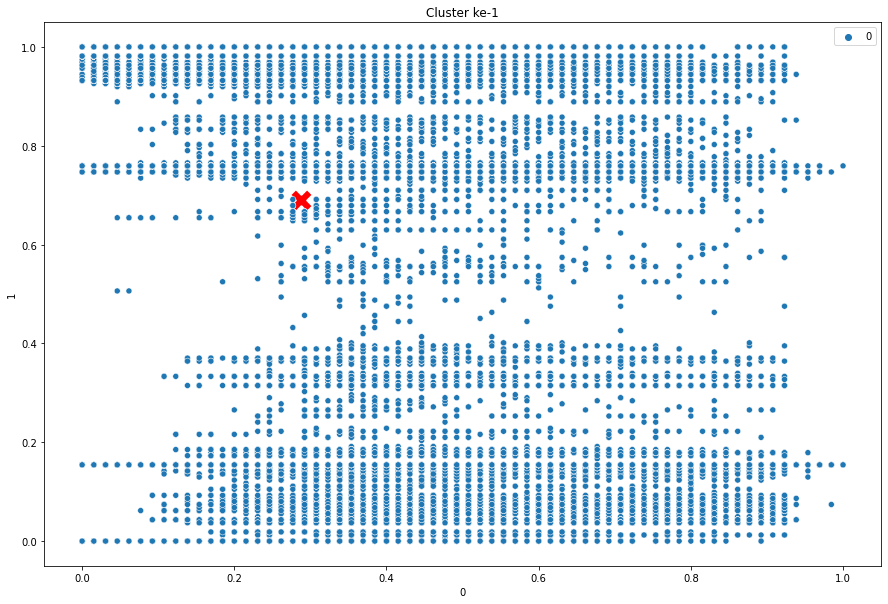

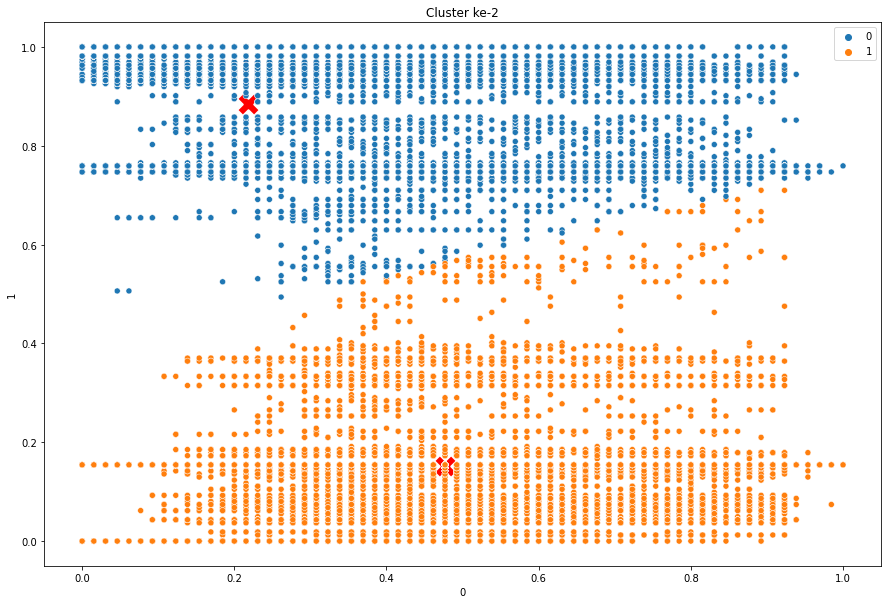

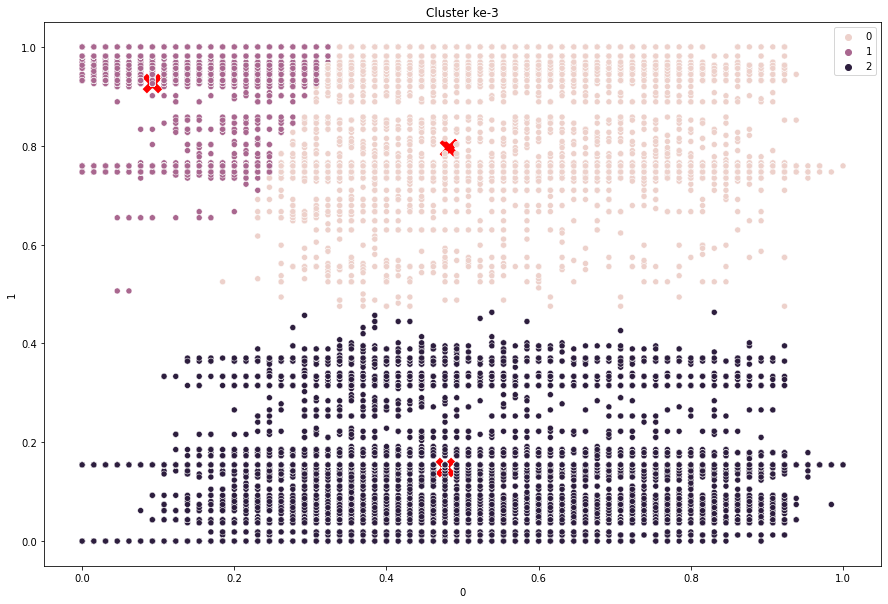

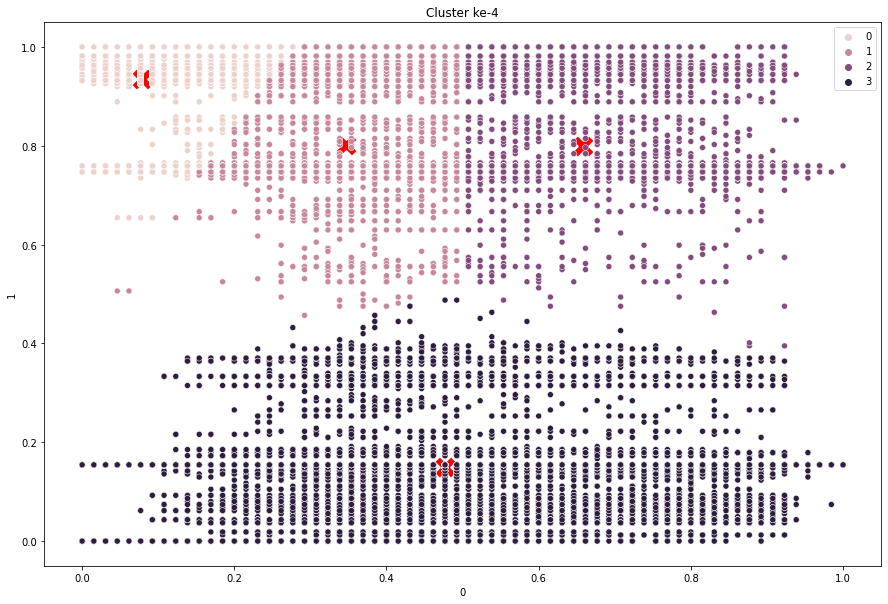

In [26]:
#Membuat main program Kmeans
k = int(input("Tentukan Nilai K : "))
newCluster =[]
for i in range(k):
    j = 1
    print('K = ', i+1)
    print('iterasi : ', j)
    c = centroid(i+1,x,y)
    cluster = clusterring(c,x,y)
    c = newCentroid(cluster,x,y)
    newCluster = clusterring(c,x,y)
    while (cluster != newCluster):
        j+=1
        print('iterasi : ', j)
        cluster = copy.deepcopy(newCluster)
        c = newCentroid(cluster,x,y)
        newCluster = clusterring(c,x,y)
    Ind = []
    for d in range(len(x)):
        j = 0
        while d not in newCluster[j]:
            j = j+1
        Ind.append(j)
    showPlot(Ind,df,c,i)


# Evaluasi

<function matplotlib.pyplot.show>

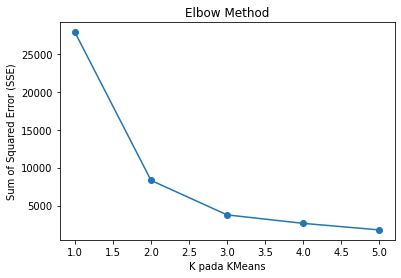

In [31]:
#Elbow Method
from sklearn.cluster import KMeans
sse = []
for i in range(1,6):
    k_mean = KMeans(n_clusters=i)
    k_mean.fit(df)
    sse.append(k_mean.inertia_)
plt.xlabel('K pada KMeans')
plt.title('Elbow Method')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(range(1,6),sse, marker='o')
plt.show
